# Sommaire :


### <a href="#C1"> **Partie 1 : Definition**</a>

 - Definition

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> 2.1 Import des packages</a>
 - <a href="#C22"> 2.2 Repertoire de travail</a>
 - <a href="#C23"> 2.3 Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Clustering**</a>
 - <a href="#C31"> 3.1 RFM</a>
 - <a href="#C32"> 3.2 CAH</a>
 - <a href="#C33"> 3.3 KMeans</a>
 - <a href="#C34"> 3.4 DBSCAN</a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Fréquence de mise à jour de la segmentation**</a>
 - <a href="#C41"> ...</a>
 - <a href="#C42"> ...</a>
 - <a href="#C43"> ...</a>
 - <a href="#C44"> ...</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : ...**</a>


...

...

...

...

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os, warnings 

# Calcul
from math import pi

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler

#metrics
from sklearn.metrics import (mean_squared_error, silhouette_samples,silhouette_score,davies_bouldin_score,
                             adjusted_rand_score,adjusted_mutual_info_score,pair_confusion_matrix)

#cluster
from sklearn.cluster import AgglomerativeClustering, KMeans,MiniBatchKMeans, DBSCAN,MeanShift,SpectralClustering,Birch
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [2]:
os.listdir('data/cleaned/')

['base_client.csv', 'clients.csv', 'rfm_df.csv']

In [3]:
path = 'data/cleaned/'
# A completer
filename = 'base_client.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [4]:
df = pd.read_csv(path+filename,sep=';',index_col=0).dropna()#.sample(10000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90314 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   NbreCommande                                            90314 non-null  int64  
 1   NbreDarticleTotal_Sum                                   90314 non-null  float64
 2   delai_livraison_Mean                                    90314 non-null  float64
 3   NbreDarticleTotal_Mean                                  90314 non-null  float64
 4   NbreArticleUnique_Mean                                  90314 non-null  float64
 5   pourc_freight_Mean                                      90314 non-null  float64
 6   dist_livraison_Mean                                     90314 non-null  float64
 7   NbredeFractionPayment_Mean                              90314 non-nu

### Selection colonnes du dataset et reduction du jeu de données

In [6]:
df = df[['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum']]
df.shape

(90314, 5)

# <a name="C3"><font color='teal'>**Partie 3 : Clustering**</font></a> 

In [7]:
#Xgd_norm = RobustScaler().fit_transform(Xgd)
scaler = StandardScaler()
X_norm = scaler.fit_transform(df)

### <a name="C31"><font color='teal'>3.1 RFM</font></a>

In [8]:
df['R_rank'] = df['Recency'].rank(ascending=False)
df['F_rank'] = df['Frequency'].rank(ascending=True)
df['M_rank'] = df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['F_rank_norm'] = (df['F_rank']/df['F_rank'].max())*100
df['M_rank_norm'] = (df['F_rank']/df['M_rank'].max())*100
 
df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
df.head()

,Recency,Frequency,Monetary,LastMeanScore_Mean,NbreDarticleTotal_Sum,R_rank_norm,F_rank_norm,M_rank_norm
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,104,1,141.90,5.0,1.0,76.289014,48.463693,48.463693
0000b849f77a49e4a4ce2b2a4ca5be3f,107,1,27.19,4.0,1.0,75.232200,48.463693,48.463693
0000f46a3911fa3c0805444483337064,530,1,86.22,3.0,1.0,3.368838,48.463693,48.463693
0000f6ccb0745a6a4b88665a16c9f078,314,1,43.62,4.0,1.0,28.990623,48.463693,48.463693
0004aac84e0df4da2b147fca70cf8255,281,1,196.89,5.0,1.0,34.072974,48.463693,48.463693


#### <font color='blue'> Calcul du score RFM Recency Frequency Monetary</font></br>

<AxesSubplot:ylabel='Frequency'>

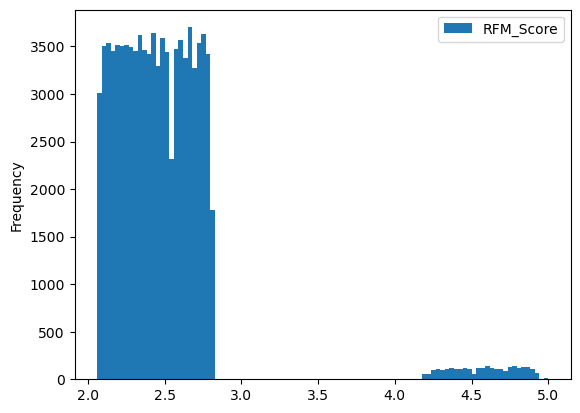

In [9]:
#df['RFM_Score'] = 0.15*df['Recency_norm']+0.28 *  df['Frequency_norm']+0.57*df['Monetary_norm']

df['RFM_Score'] = 0.15*df['R_rank_norm']+0.35 * df['F_rank_norm']+0.50*df['M_rank_norm']

df['RFM_Score'] *= 0.05
df = df.round(2)
df[['RFM_Score']].plot(kind='hist',bins=100)

#### <font color='blue'> Évaluation du client basée sur le score RFM</font></br>

In [10]:
df["Customer_segment"] = np.where(df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
df[[ 'RFM_Score', 'Customer_segment']].head(7)

,RFM_Score,Customer_segment
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2.63,Low Value Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,2.62,Low Value Customers
0000f46a3911fa3c0805444483337064,2.08,Low Value Customers
0000f6ccb0745a6a4b88665a16c9f078,2.28,Low Value Customers
0004aac84e0df4da2b147fca70cf8255,2.32,Low Value Customers
0004bd2a26a76fe21f786e4fbd80607f,2.56,Low Value Customers
00050ab1314c0e55a6ca13cf7181fecf,2.59,Low Value Customers


Low Value Customers    87538
Top Customers           1693
High value Customer     1083
Name: Customer_segment, dtype: int64


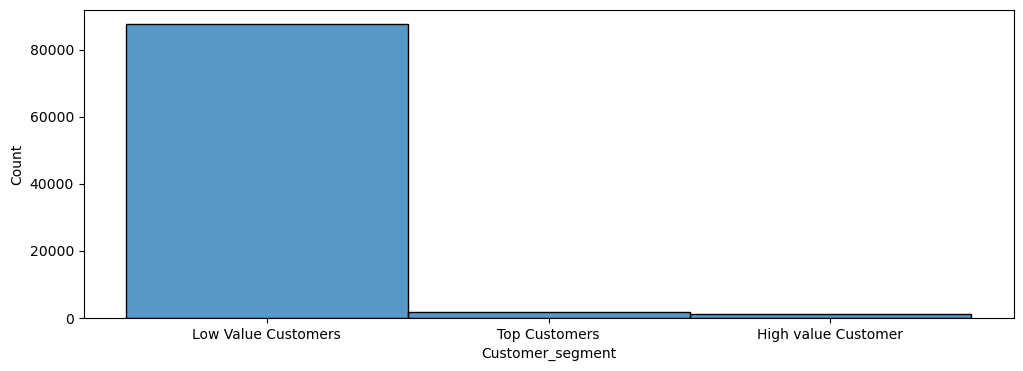

In [11]:
fig,axe = plt.subplots(figsize=(12,4))
print(df.Customer_segment.value_counts())
sns.histplot(data = df,x = 'Customer_segment',ax=axe);

Connaissance metier insuffisance et qualité clustering dépendra du parametrage initié par le DS

### <a name="C32"><font color='teal'>3.2 CAH</font></a>

Lancer un CAH sur l'ensemble des dnnées demande une puissance machine importante, et un temps d'exécution élevé.</br>
Methode 1: Lancer CAH sur echantillons de données n = 10000</br>
Méthode 2: lancer kmeans avec k = 10000, récuperer les k=10000 centres de clusters, lancer CAH sur les 10000 centres

#### <font color='teal'>Méthode 1 : Echantillonnage</font>

CPU times: total: 7.31 s
Wall time: 10.5 s


Text(0.5, 1.0, 'average link')

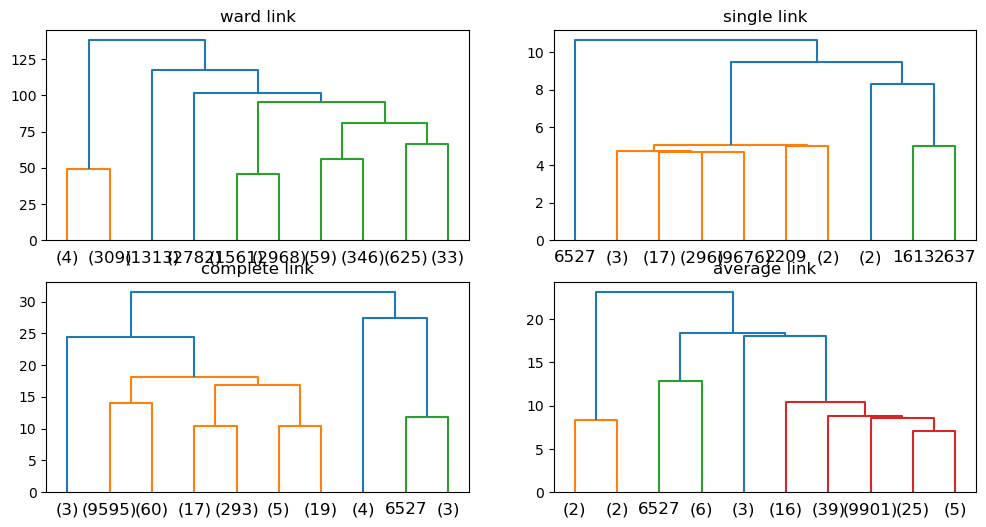

In [12]:
%%time

fig = plt.figure(figsize=(12,6))

Xtest = X_norm[np.random.randint(X_norm.shape[0],size=10000),:]

ax = fig.add_subplot(221)
Z = linkage(Xtest,method='ward')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('ward link')

ax = fig.add_subplot(222)
Z = linkage(Xtest,method='single')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('single link')

ax = fig.add_subplot(223)
Z = linkage(Xtest,method='complete')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('complete link')

ax = fig.add_subplot(224)
Z = linkage(Xtest,method='average')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('average link')


plusieurs choix seront testés.</br>
k = 2 ou k = 3 ou k= 6

CPU times: total: 9.84 s
Wall time: 11.6 s


Text(0.5, 1.0, 'Indice de Davies Bouldin \nMinimum atteint à k=2')

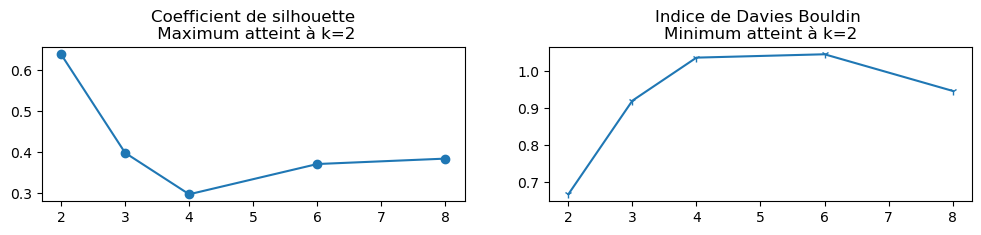

In [13]:
%%time
warnings.filterwarnings("ignore")

silhouette = []
DaviesBouldin = []
N_CLUSTER_TESTER = [2,3,4,6,8]

Z = linkage(Xtest,method='ward')

# Selection du nombre de cluster K optimal
# 1
for k in N_CLUSTER_TESTER:
    clustersCAH = fcluster(Z, k, criterion='maxclust')
    slh = silhouette_score(Xtest, clustersCAH, metric='euclidean')
    dbi = davies_bouldin_score(Xtest, clustersCAH)
    
    silhouette.append(slh)
    DaviesBouldin.append(dbi)

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(121)
ax.plot(N_CLUSTER_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à k='+str(N_CLUSTER_TESTER[np.argmax(silhouette)]))


ax = fig.add_subplot(122)
ax.plot(N_CLUSTER_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à k='+str( N_CLUSTER_TESTER[np.argmin(DaviesBouldin)] ));

#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

Je choisi la méthode de ward qui fourni plus de groupe

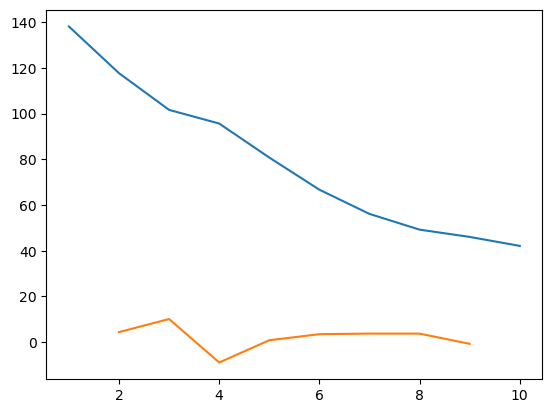

Best number of clusters: 3


In [14]:
Z = linkage(Xtest,method='ward')

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("Best number of clusters:", k)

#### <font color='teal'> Visualisation grace a l'ACP et T-SNE</font>

In [15]:
from sklearn.decomposition import PCA
pcav = PCA()
pcav.fit(Xtest)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pcav.explained_variance_ratio_.cumsum()[1])
print('\n',pcav.explained_variance_)
X_projtest=pcav.transform(Xtest)

Le pourcentage d'inertie expliqué par les 2 premiers axes est  0.525725985199271

 [1.55178425 1.00863025 0.99237908 0.78087389 0.53657782]


''

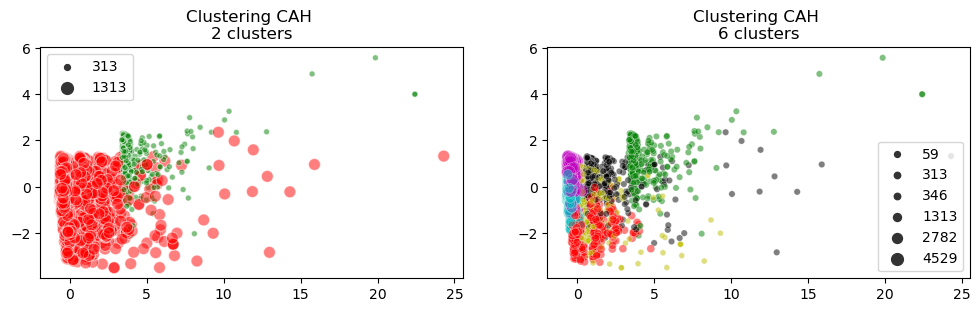

In [16]:
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure(figsize=(12,3))

couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
_, counts = np.unique(clustersCAH, return_counts=True)

# k=2 
#ACP
clustersCAH = fcluster(Z, 2, criterion='maxclust')
ax = fig.add_subplot(121)
sns.scatterplot(X_projtest[:,0],X_projtest[:,1],
                c=[couleurs[i] for i in clustersCAH],
               size=[counts[i-1] for i in clustersCAH],
               alpha=0.5)
ax.set_title('Clustering CAH \n2 clusters')


# k=6 
#ACP
clustersCAH = fcluster(Z, 6, criterion='maxclust')
ax = fig.add_subplot(122)
sns.scatterplot(X_projtest[:,0],X_projtest[:,1],
                c=[couleurs[i] for i in clustersCAH],
                size=[counts[i-1] for i in clustersCAH],
               alpha=0.5)
ax.set_title('Clustering CAH \n6 clusters')
;

### Description Clustering

In [17]:
DF_result_CAH = pd.DataFrame(Xtest,
                             columns=['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum'])
DF_result_CAH['ResultCAHward2'] = fcluster(Z, 2, criterion='maxclust')
DF_result_CAH['ResultCAHward3'] = fcluster(Z, 3, criterion='maxclust')
DF_result_CAH['ResultCAHward6'] = clustersCAH = fcluster(Z, 6, criterion='maxclust')

In [18]:
pd.set_option('display.max_rows', None)
DF_result_CAH.groupby(['ResultCAHward2']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResultCAHward2,1,2
Recency,-0.060632,-0.001307
Frequency,5.001367,-0.158534
Monetary,0.565429,-0.035808
LastMeanScore_Mean,0.062797,0.001430
NbreDarticleTotal_Sum,2.057903,-0.055003
ResultCAHward3,1.000000,2.864458
ResultCAHward6,1.000000,3.619387


In [19]:
pd.set_option('display.max_rows', None)
DF_result_CAH.groupby(['ResultCAHward3']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResultCAHward3,1,2,3
Recency,-0.060632,-0.018017,0.001313
Frequency,5.001367,-0.161452,-0.158076
Monetary,0.565429,-0.119175,-0.022736
LastMeanScore_Mean,0.062797,-2.120247,0.334098
NbreDarticleTotal_Sum,2.057903,0.168910,-0.090111
ResultCAHward2,1.000000,2.000000,2.000000
ResultCAHward6,1.000000,2.000000,3.873298


In [20]:
pd.set_option('display.max_rows', None)
DF_result_CAH.groupby(['ResultCAHward6']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResultCAHward6,1,2,3,4,5,6
Recency,-0.060632,-0.018017,1.072629,-0.657267,-0.121678,0.080526
Frequency,5.001367,-0.161452,-0.161452,-0.161452,-0.161452,-0.118492
Monetary,0.565429,-0.119175,-0.218791,-0.215127,3.011693,0.262704
LastMeanScore_Mean,0.062797,-2.120247,0.447220,0.319312,-0.378065,0.395932
NbreDarticleTotal_Sum,2.057903,0.168910,-0.290890,-0.290890,-0.066490,2.126191
ResultCAHward2,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
ResultCAHward3,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000


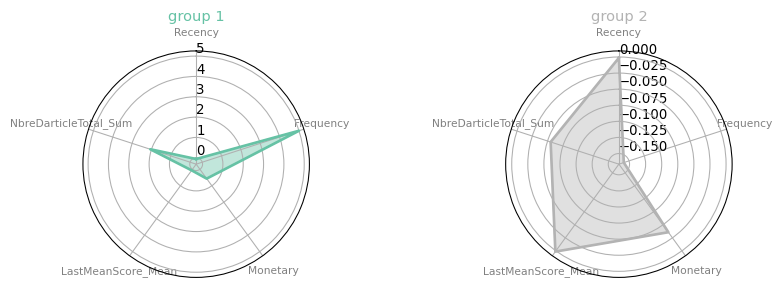

In [21]:
# Cluster
nom_cluster = 'ResultCAHward2'
 
# Set data
dff = DF_result_CAH.groupby([nom_cluster]).mean().reset_index().drop(columns=['ResultCAHward3','ResultCAHward6'])
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(dff)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([-2,-1,0,1,2,3,4,5], ["-2","-1","0","1","2","3","4","5"], color="grey", size=7)
    #plt.ylim(-2,80)

    # Ind1
    values=dff.loc[row].drop(nom_cluster).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(dff.index))
 
# Loop to plot
for row in range(0, len(dff.index)):
    make_spider( row=row, title='group '+ str(dff[nom_cluster][row]), color=my_palette(row))

Idem

<AxesSubplot:>

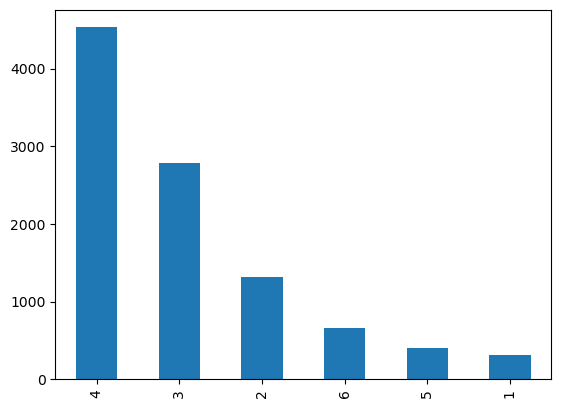

In [22]:
pd.Series(clustersCAH).value_counts().plot(kind='bar')

#### <font color='teal'> Methode 2 CAH sur centre kmeans </font>

CPU times: total: 1min 12s
Wall time: 22.4 s


Text(0.5, 1.0, 'ward link')

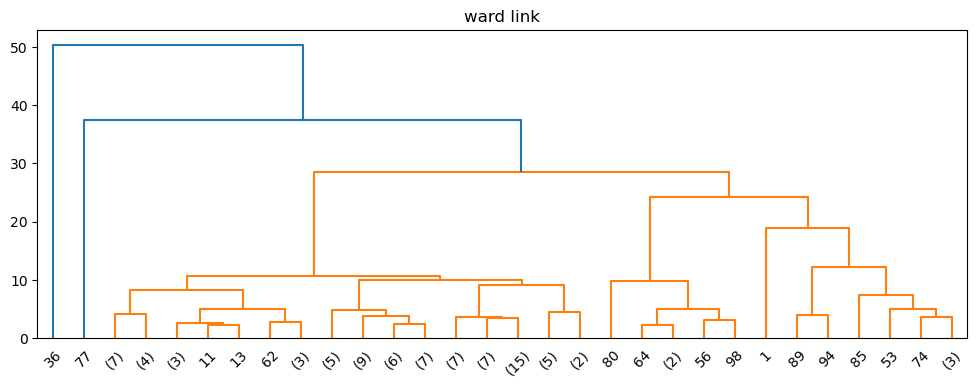

In [23]:
%%time

fig = plt.figure(figsize=(12,4))

cls = KMeans(n_clusters=100,init = 'random',n_init=20)
cls.fit(X_norm)
centres = cls.cluster_centers_

ax = fig.add_subplot(111)
Z = linkage(centres,method='ward')
_ = dendrogram(Z,p=30,truncate_mode='lastp',ax=ax)
ax.set_title('ward link')

### <a name="C33"><font color='teal'>3.3 KMeans</font></a>

#### <a name="C331"><font color='teal'>3.3.1 Selection du nombre de cluster K optimal</font></a>

##### <a name="C311"><font color='teal'>Coefficient de silhouette et DB Index</font></a>

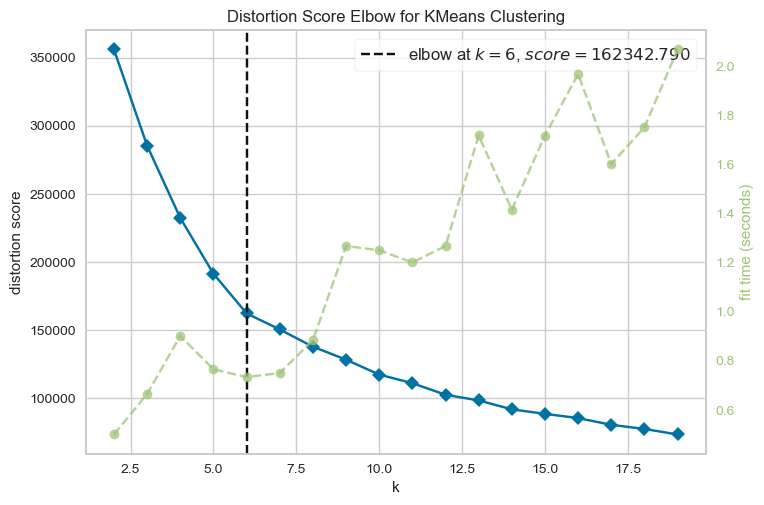

In [24]:
import matplotlib as mpl 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#mpl.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_norm)    # Fit the data to the visualizer
visualizer.poof() ;   # Draw/show/poof the data

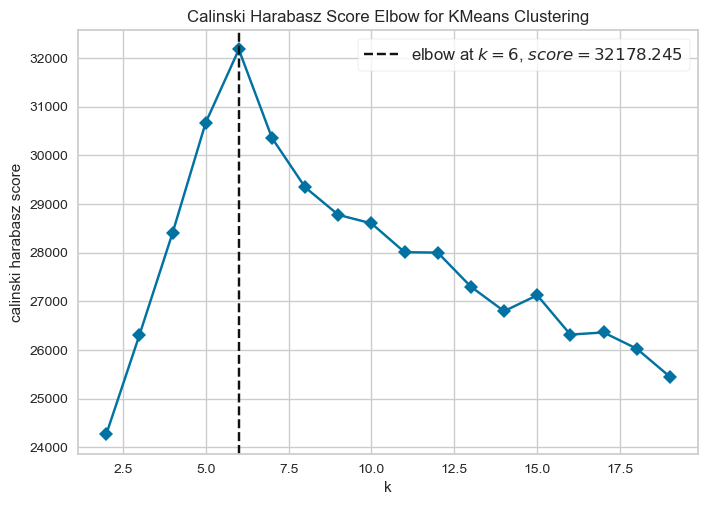

In [25]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz', timings=False)

visualizer.fit(X_norm)    # Fit the data to the visualizer
visualizer.poof();    # Draw/show/poof the data

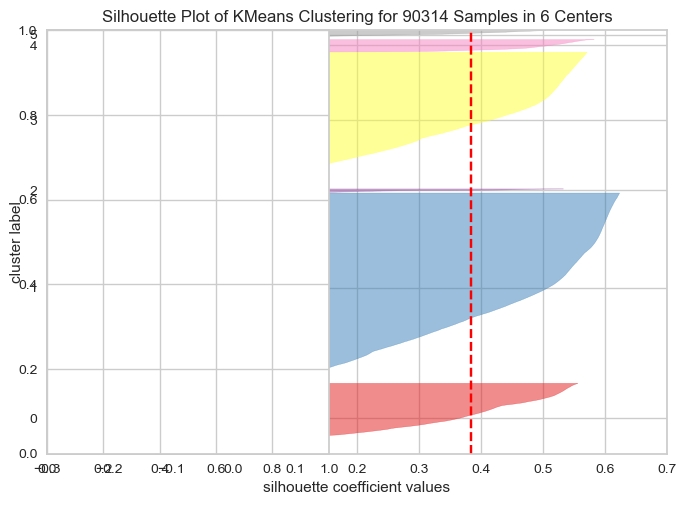

In [26]:
# Instantiate the clustering model and visualizer 

fig = plt.figure()

## 6 groupes
model = KMeans(n_clusters=6)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X_norm)    # Fit the data to the visualizer

ax2 = fig.add_subplot(121)
ax2 = visualizer.poof()    # Draw/show/poof the data


<div class="alert alert-warning">Le meilleur nombre de cluster est selon:</br>
    - Le coefficient de silhouette 2 </br>
    - La courbe de l'inertie intraclasse 6</br>
    - l'indice de Davies Bouldin 2</br>
   Conserver 2groupes
    </div>

##### <a name="C311"><font color='teal'>Visualisation </font></a>

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_norm)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pca.explained_variance_ratio_.cumsum()[1])
X_proj=pca.transform(X_norm)

Le pourcentage d'inertie expliqué par les 2 premiers axes est  0.5172633343985644


CPU times: total: 1min 52s
Wall time: 1min 42s


''

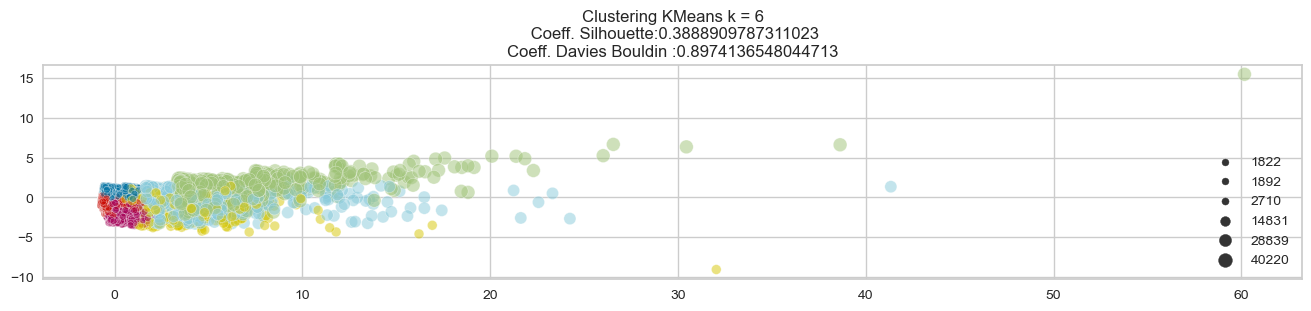

In [28]:
%%time
fig, axs = plt.subplots(1, 1, figsize=(13, 3), constrained_layout=True)

km = KMeans(n_clusters=6,init='k-means++')
km.fit(X=X_norm)
labels = km.labels_

couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
_, counts = np.unique(labels, return_counts=True)

sns.scatterplot(X_proj[:,0],X_proj[:,1],c=[couleurs[i] for i in labels],
                ax=axs,
                size=[counts[i-1] for i in labels],
                alpha=0.5 )

title_text = 'Clustering KMeans k = 6\n Coeff. Silhouette:'\
+ str(silhouette_score(X_norm, labels, metric='euclidean'))\
              + '\nCoeff. Davies Bouldin :'\
              +str(davies_bouldin_score(X_norm, labels))

axs.set_title( title_text )
;

#### Intercluster Distance

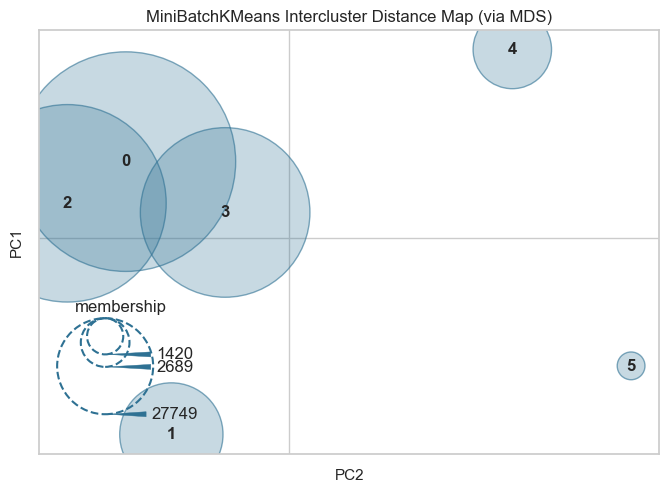

CPU times: total: 1.5 s
Wall time: 396 ms


In [29]:
%%time
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans

couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
_, counts = np.unique(clustersCAH, return_counts=True)


visualizer = intercluster_distance(estimator=MiniBatchKMeans(6, random_state=777,batch_size=2048),
                                   embedding='mds', X=X_norm)


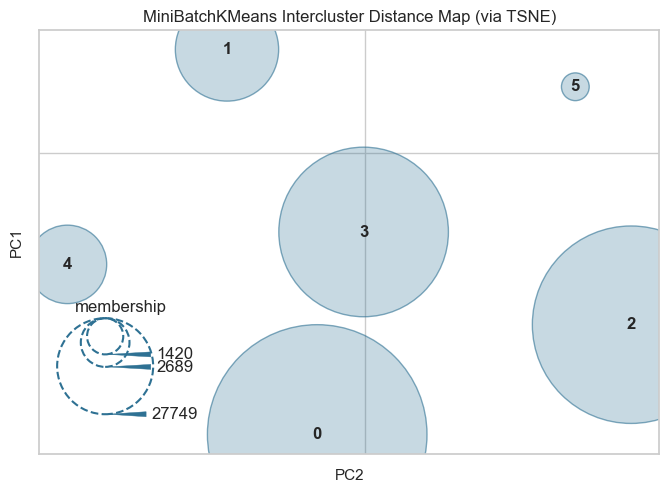

In [30]:
visualizer = intercluster_distance(estimator=MiniBatchKMeans(6, random_state=777,batch_size=2048),
                                   embedding='tsne', X=X_norm)

##### RadViz

In [31]:
from yellowbrick.features.rankd import Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates

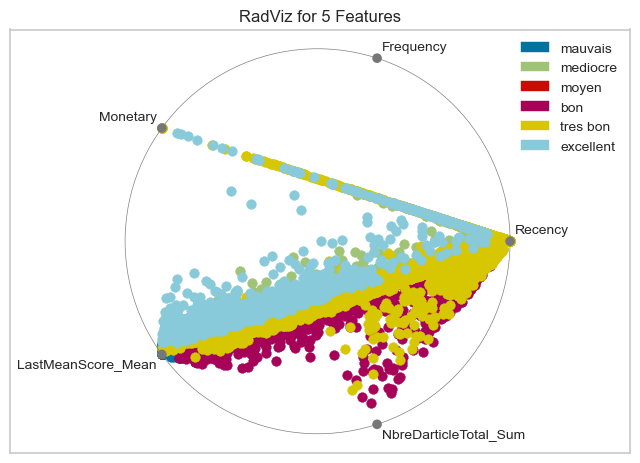

CPU times: total: 2.16 s
Wall time: 3.21 s


<AxesSubplot:title={'center':'RadViz for 5 Features'}>

In [32]:
%%time
classe = ["mauvais" ,'mediocre','moyen','bon','tres bon','excellent'] 
X = df.drop(columns=['Customer_segment','R_rank_norm','F_rank_norm','M_rank_norm','RFM_Score']).copy()
y =  labels

visualizer = RadViz(classes=classe, features=X.columns )


visualizer.fit(X.values,y)      # Fit the data to the visualizer
visualizer.transform(X.values)   # Transform the data
visualizer.poof();

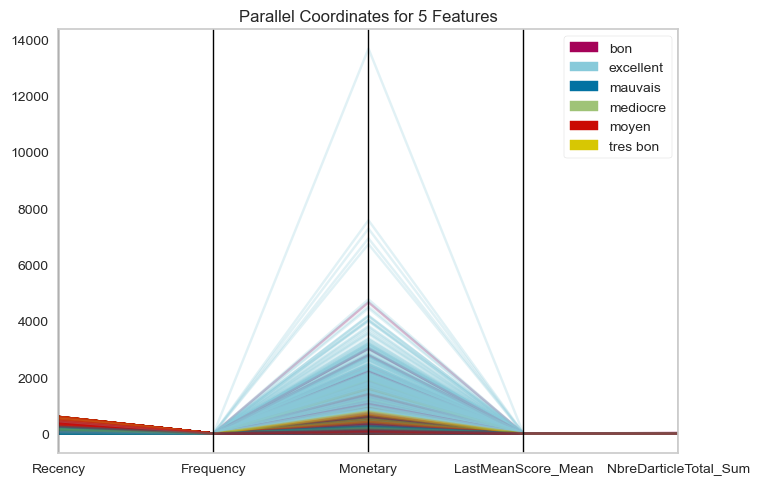

CPU times: total: 1min 30s
Wall time: 2min 1s


<AxesSubplot:title={'center':'Parallel Coordinates for 5 Features'}>

In [33]:
%%time
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classe, features=X.columns)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof();         # Draw/show/poof the data

In [34]:
DF_resultFinal_kmeans = pd.DataFrame(X_norm,
                             columns=['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum'])

DF_resultFinal_kmeans['Resultkmeans6'] = labels

In [35]:
pd.set_option('display.max_rows', None)
DF_resultFinal_kmeans.groupby(['Resultkmeans6']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

Resultkmeans6,0,1,2,3,4,5
Recency,-0.739153,-0.102088,1.049440,-0.027366,-0.012099,-0.015478
Frequency,-0.161452,5.099166,-0.161452,-0.036947,-0.161452,-0.112322
Monetary,-0.152843,0.523599,-0.149562,0.789629,-0.085305,4.836867
LastMeanScore_Mean,0.432400,0.036996,0.391761,-0.534566,-1.872413,-0.004516
NbreDarticleTotal_Sum,-0.194210,2.073988,-0.182506,4.473154,-0.064707,-0.027236


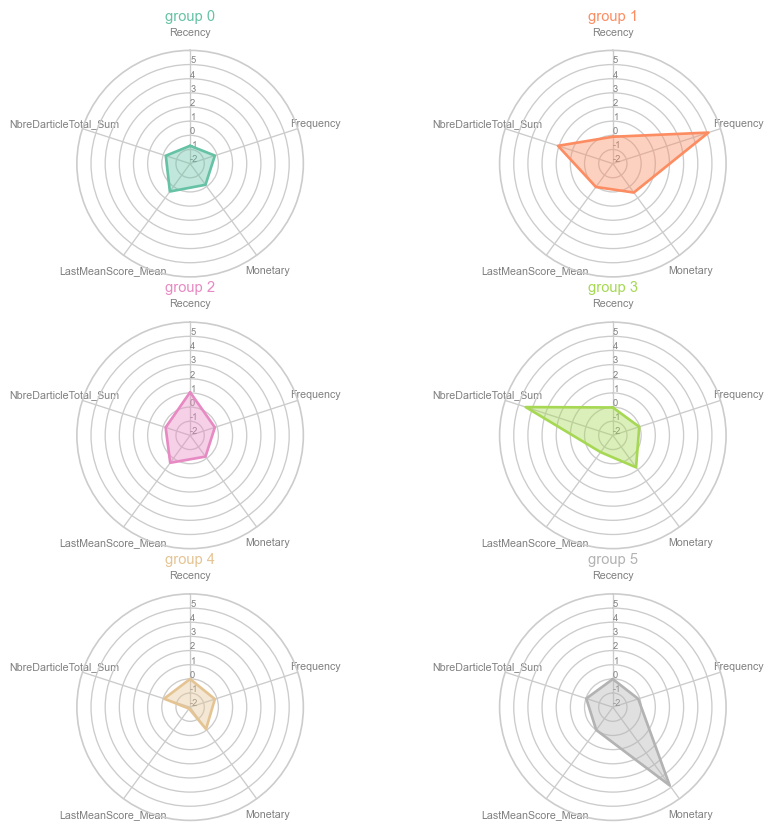

In [36]:
from math import pi
 
# Set data
dff = DF_resultFinal_kmeans.groupby(['Resultkmeans6']).mean().reset_index()
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(dff)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-2,-1,0,1,2,3,4,5], ["-2","-1","0","1","2","3","4","5"], color="grey", size=7)
    plt.ylim(-2,6)

    # Ind1
    values=dff.loc[row].drop('Resultkmeans6').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(dff.index))
 
# Loop to plot
for row in range(0, len(dff.index)):
    make_spider( row=row, title='group '+ str(dff['Resultkmeans6'][row]), color=my_palette(row))

##### <a name="C311"><font color='teal'>Stabilité du clustering</font></a>

CPU times: total: 2min 30s
Wall time: 30.2 s


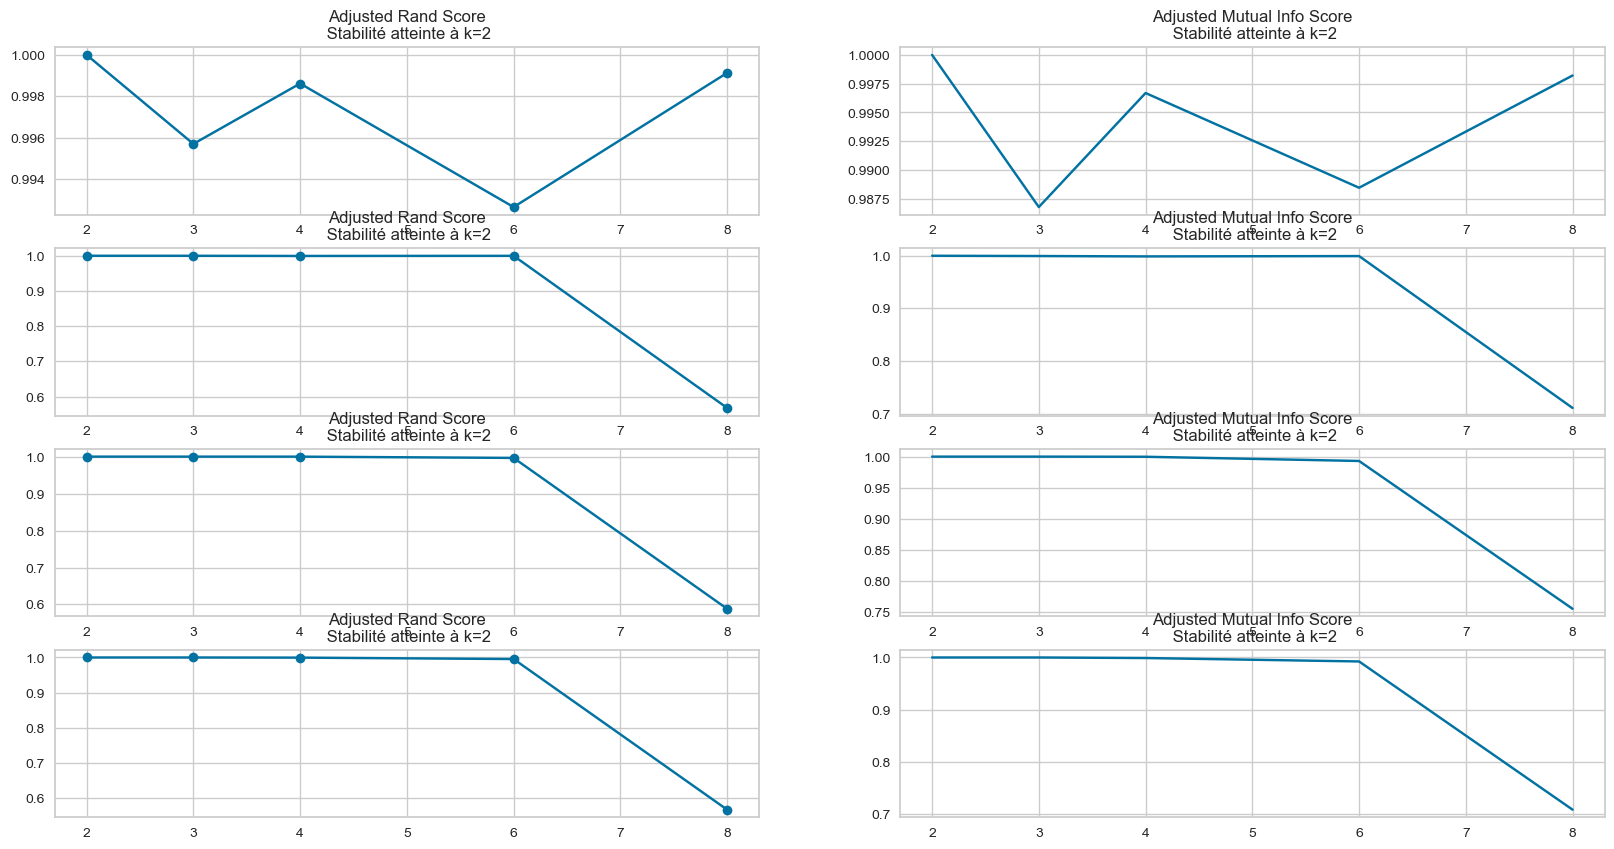

In [37]:
%%time

import warnings
warnings.filterwarnings("ignore")


# Selection du nombre de cluster K optimal en fonction de la stabilité
fig, ax = plt.subplots(4,2, figsize=(20, 10) )

for lll in range(4):
    ARI = []
    AMI = []
    cc = []
    for k in N_CLUSTER_TESTER:
        cc = []
        for l in range(2):
            cls = KMeans(n_clusters=k, init = 'k-means++')
            cls.fit(X_norm)
            cc.append(cls.labels_)
        ari = adjusted_rand_score(cc[0], cc[1])
        ami = adjusted_mutual_info_score(cc[0], cc[1])

        ARI.append(ari)
        AMI.append(ami)

    #fig = plt.figure(figsize=(12,3))

    #ax = fig.add_subplot(121)
    ax[lll][0].plot(N_CLUSTER_TESTER, ARI,marker='o')
    ax[lll][0].set_title('Adjusted Rand Score\n Stabilité atteinte à k='+str( N_CLUSTER_TESTER[np.argmax(ARI)] ) )

    #ax = fig.add_subplot(122)
    ax[lll][1].plot(N_CLUSTER_TESTER, AMI,marker='1')
    ax[lll][1].set_title('Adjusted Mutual Info Score\n Stabilité atteinte à k='+str( N_CLUSTER_TESTER[np.argmax(AMI)] ) );

### Stable si Indice égale 1 dc k=2 ou k=4 sont conservés

### <a name="C34"><font color='teal'>3.4 DBSCAN</font></a>

### Find MinPts et ε

How to determine MinPts</br>
set D = X_norm.shape[1] </br>
- MinPts ⩾ D + 1</br>
- MinPts = 2 * D </br>


How to determine ε (Epsilon)

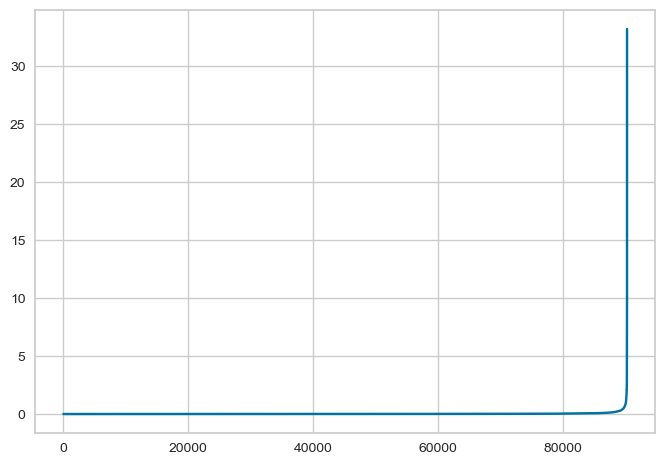

In [38]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=X_norm.shape[1] * 2)
neighbors_fit = neighbors.fit(X_norm)
distances, indices = neighbors_fit.kneighbors(X_norm)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

Zoom sur le coude

best epsilon: 7.13


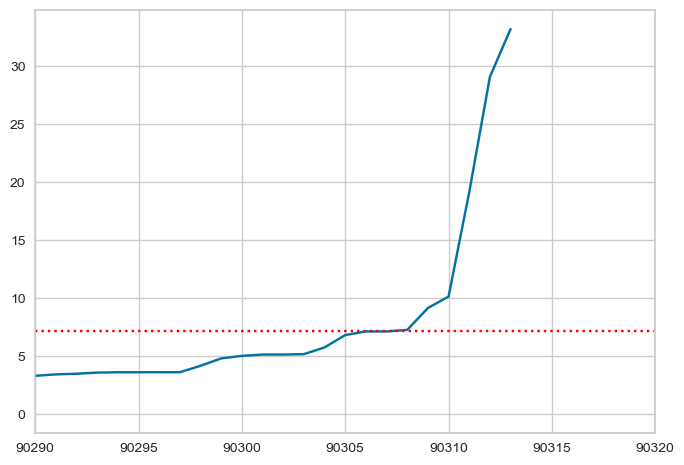

In [39]:
ax = plt.subplot(111)
ax.set_xlim(90290,90320)

best_k = 90307

ax.plot(distances)
# only one line may be specified; full height
plt.axhline(y = distances[best_k], color = 'red', ls=':',label = 'axvline - full height');
print('best epsilon:',round(distances[best_k],2))
best_epsilon = round(distances[best_k],2)

In [44]:
X_red = X_norm[np.random.choice(range(X_norm.shape[0]),replace=False, size=20000),:]

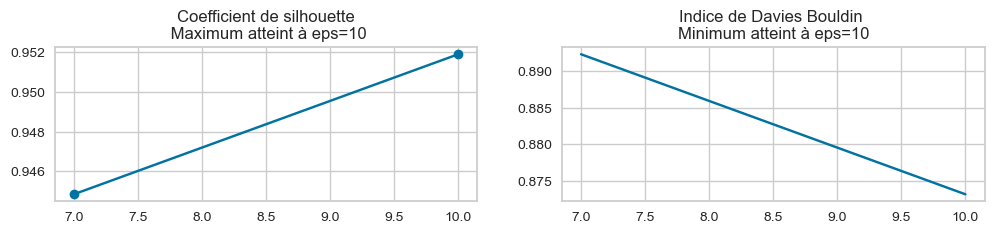

In [45]:
import warnings
warnings.filterwarnings("ignore")

silhouette = []
inertie = []
DaviesBouldin = []
EPS_TESTER = [7,10]

# Selection du nombre de cluster K optimal
# 1
for k in EPS_TESTER:
    dbscan = DBSCAN(eps=k, metric='euclidean',min_samples=X_red.shape[1]*2,algorithm='kd_tree')
    dbscan.fit(X_red)
    slh = silhouette_score(X_red, dbscan.labels_, metric='euclidean')
    dbi = davies_bouldin_score(X_red, dbscan.labels_)
    
    silhouette.append(slh)
    DaviesBouldin.append(dbi)
    

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(121)
ax.plot(EPS_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à eps='+str(EPS_TESTER[np.argmax(silhouette)]))

ax = fig.add_subplot(122)
ax.plot(EPS_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à eps='+str( EPS_TESTER[np.argmin(DaviesBouldin)] ));


#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

In [46]:
pcaRed = PCA()
pcaRed.fit(X_red)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pcaRed.explained_variance_ratio_.cumsum()[1])
X_projRed=pcaRed.transform(X_red)

dbscan = DBSCAN(eps=10, metric='euclidean',min_samples=2 * X_norm.shape[1])
dbscan.fit(X_red)
dbscan_labels = dbscan.labels_

Le pourcentage d'inertie expliqué par les 2 premiers axes est  0.5411157977911758


In [47]:
pd.Series(dbscan_labels).value_counts()

 0    19996
-1        4
dtype: int64

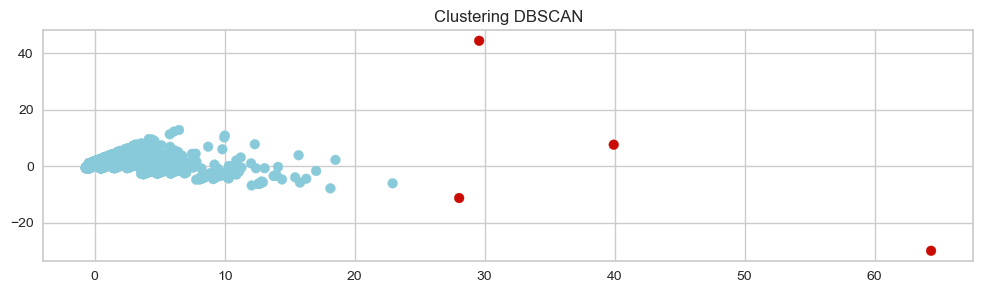

In [48]:
fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(111)
plt.scatter(X_projRed[:,0],X_projRed[:,1],c=[couleurs[i+3] for i in dbscan_labels])
ax.set_title('Clustering DBSCAN');

DBSCAN a créé un groupe unique et à detrecter un ensemble d'outliers

### Description Clustering

In [49]:
pd.set_option('display.max_rows', None)

DF_result_DB = pd.DataFrame(X_red,
                             columns=['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum'])

DF_result_DB['ResDBscan'] = dbscan.labels_
DF_result_DB.groupby(['ResDBscan']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResDBscan,-1,0
Recency,-0.865532,-0.008758
Frequency,28.106109,0.007481
Monetary,21.384985,0.005291
LastMeanScore_Mean,-0.278942,-0.006594
NbreDarticleTotal_Sum,21.212497,0.001209


# <a name="C4"><font color='red'>**Partie 4 : Fréquence de mise à jour de la segmentation**</font></a> 

### <font color='red'>Import dataframe clients</font>

In [50]:
clients = pd.read_csv('data/cleaned/clients.csv',sep=';',index_col=0).dropna()
clients['order_purchase_timestamp'] = pd.to_datetime(clients['order_purchase_timestamp'])

rfm_df = pd.read_csv('data/cleaned/rfm_df.csv',sep=';',index_col=0).dropna()

In [51]:
# Creation du dataset df
def create_dataframe_by_month(clients,offset = 1):
    
    """ Creer un dataframe """
    date_string = "2018-"+str(offset+1)+"-1"
    
    df_mean = clients\
    .drop(columns=['year'])\
       .groupby(['customer_unique_id']).agg('mean')\
       .reset_index()

    # Renommer les colonnes en add suffixe '_mean'
    df_mean.columns = [df_mean.columns[0] ]+ [x + '_Mean' for x in df_mean.columns[1:]] 

    df_month = clients[['customer_unique_id','order_id','NbreDarticleTotal']]\
    .loc[clients.order_purchase_timestamp<pd.to_datetime(date_string)]\
    .groupby(['customer_unique_id']).aggregate({'order_id':'count', 'NbreDarticleTotal':'sum'})\
    .rename(columns={'order_id':'NbreCommande', 'NbreDarticleTotal':'NbreDarticleTotal_Sum'})\
    .reset_index()\
    .merge(df_mean, on='customer_unique_id', how = 'left' )\
    .merge(rfm_df,on='customer_unique_id',how = 'left')
    
    #Selection des variables
    df_res = df_month[['customer_unique_id','Recency', 'Frequency', 'Monetary', 
                       'LastMeanScore_Mean', 'NbreDarticleTotal_Sum']]
    
    # definir index
    df_res = df_res.set_index('customer_unique_id')

    return df_res

### <font color='red'>Creation des bases de clients par moi</font>

In [52]:
scaler0 = StandardScaler()

# initialisation b0
b0 = scaler0.fit_transform(create_dataframe_by_month(clients,offset = 0))

b1 = scaler0.transform(create_dataframe_by_month(clients,offset = 1))
b2 = scaler0.transform(create_dataframe_by_month(clients,offset = 2))
b3 = scaler0.transform(create_dataframe_by_month(clients,offset = 3))
b4 = scaler0.transform(create_dataframe_by_month(clients,offset = 4))
b5 = scaler0.transform(create_dataframe_by_month(clients,offset = 5))
b6 = scaler0.transform(create_dataframe_by_month(clients,offset = 6))
b7 = scaler0.transform(create_dataframe_by_month(clients,offset = 7))
b8 = scaler0.transform(create_dataframe_by_month(clients,offset = 8))

# list des bases
bases = [b0, b1, b2, b3, b4, b5, b6, b7, b8]

### <font color='red'>Evaluation performance du clustering en fonction de l'évolution du temps</font>

In [53]:
b0.shape[0], b1.shape[0],b2.shape[0], b3.shape[0], b4.shape[0], b5.shape[0],b6.shape[0], b7.shape[0], b8.shape[0],

(40543, 47311, 53518, 60251, 66761, 73196, 78966, 84799, 90314)

#### <font color='red'>modèle 2017 v0</font>

In [61]:
#cls = MiniBatchKMeans(n_clusters=k,init = 'k-means++',batch_size=2048)
cl0 = KMeans(n_clusters=6,init = 'k-means++',n_init=10)
cl0.fit(b0)

KMeans(n_clusters=6)

In [62]:
## Predct labels pour chaques mois
labels0 = []

for b in bases:
    labels0.append( cl0.predict(b) )

#### <font color='red'>Un model par mois</font>

In [63]:
# initialisation de la liste des models de clustering
labelsi = []

for i,b in enumerate(bases):
    cli = KMeans(n_clusters=6,init = 'k-means++').fit(b)
    labelsi.append(cli.labels_)

#### <font color='red'>Comparaison model0 vs differents models mensuelle</font>

In [64]:
ARI = []
AMI = []

for i,_ in enumerate(bases):
    ari = adjusted_rand_score(labels0[i], labelsi[i])
    ami = adjusted_mutual_info_score(labels0[i], labelsi[i])

    ARI.append(ari)
    AMI.append(ami)

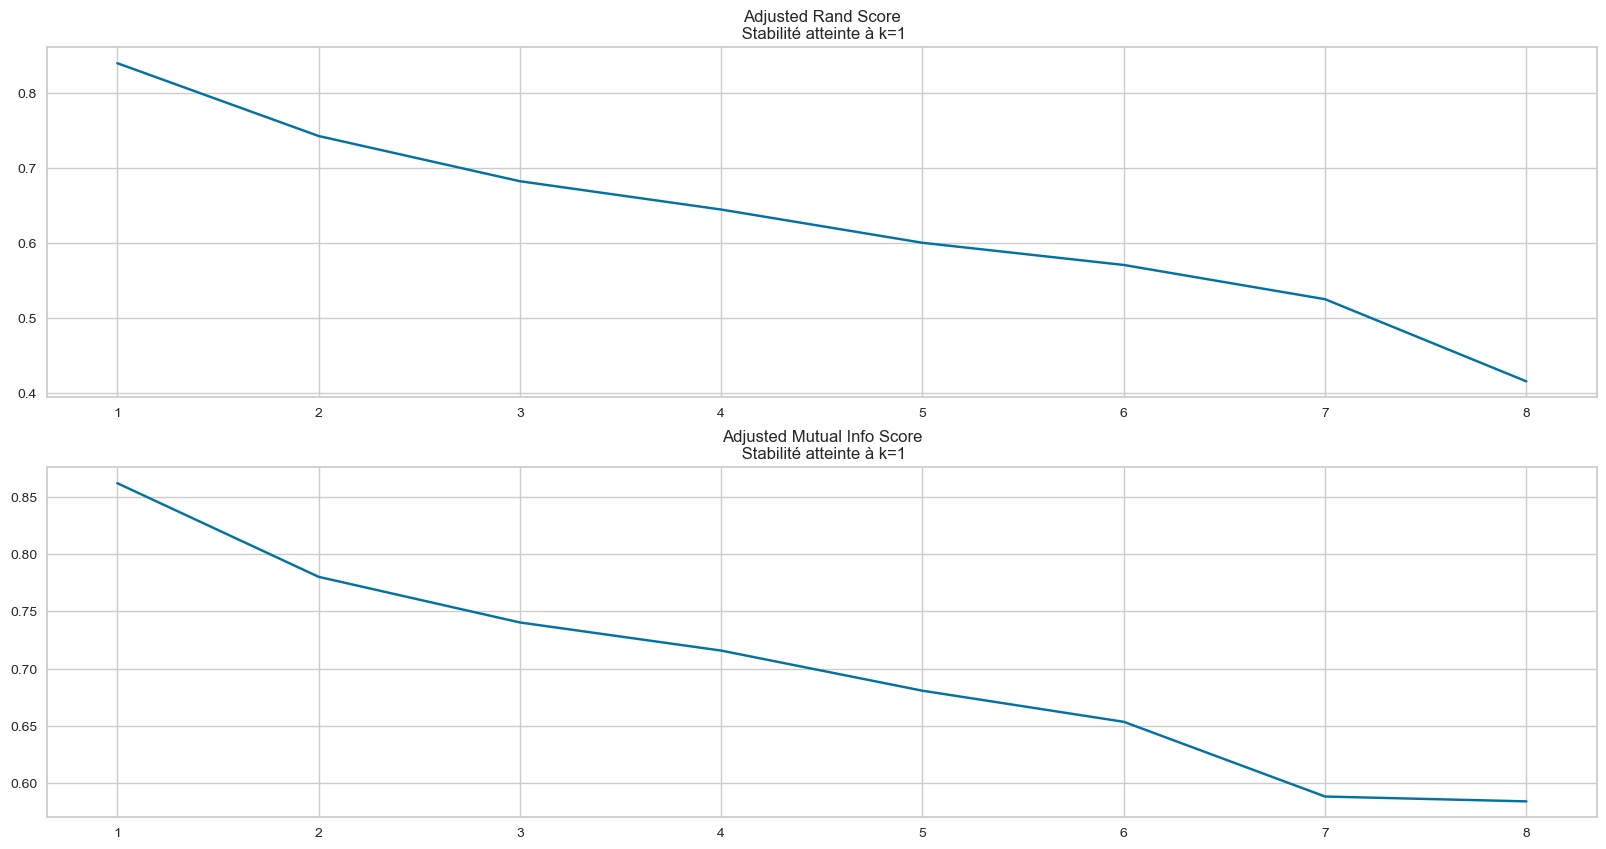

In [65]:
fig, ax = plt.subplots(2,1, figsize=(20, 10) )
sns.lineplot(x = range(1,9), y = ARI[1:],ax = ax[0])
ax[0].set_title('Adjusted Rand Score\n Stabilité atteinte à k='+str( range(1,9)[np.argmax(ARI[1:])] ) )

#ax = fig.add_subplot(122)
sns.lineplot(x = range(1,9), y = AMI[1:], ax = ax[1])
ax[1].set_title('Adjusted Mutual Info Score\n Stabilité atteinte à k='+str( range(1,9)[np.argmax(AMI[1:])] ) );

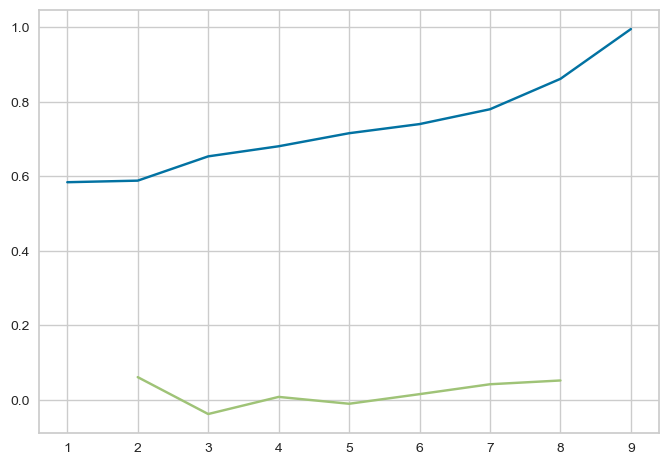

Best number of clusters: 2


In [66]:
last = AMI[-10:]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("Best number of clusters:", k)

Mise à jour tous les 4 mois